# Problématique :

### Bob est victime d'un mauvais sort, il se sent toujours un peu déphasé. Vous savez que le rituel pour lever cette malédiction est consigné dans un grimoire qui se trouve dans une bibliothèque quantique.



# <img src="mal.png" alt="alt text" width="800"/>

### Le problème est que dans une bibliothèque quantique l'emprunt se fait toujours au hasard. En empruntant un grimoire, vous ne savez pas sur lequel vous allez tomber. La bonne nouvelle est que cette section de la bibliothèque ne compte que 3 autres grimoires. La mauvaise ... c'est que ceux-ci ne contiennent que plus de malédictions

# <img src="ord1.png" alt="alt text" width="800"/>

### Pour vous aider, vous faites appel à Aïka qui a le pouvoir de marquer le bon grimoire en inversant sa phase quantique.

| <img src="AK.png" alt="alt text 1" width="700"/> | <img src="ord.png" alt="alt text 2" width="700"/> |
|:------------------------------------------------:|:-------------------------------------------------:|

### En combinant vos connaissances à celles d'Aïka, vous mettez en place un algorithme bien connu en informatique quantique l'algorithme de Grover. La bibliothèque quantique attribue initialement une chance égale d'emprunter n'importe lequel de ces grimoires. Dans l'état actuel des choses si vous emprunter un grimoire, vous avez 1 chance sur 4 de tomber sur le bon, on peut donc attribuer à chacun des grimoires une probabilité de 1/4. Pour décrire la situation dans le monde quantique on assigne d'abord chaque grimoire à un état quantique. Ensuite, il est plus facile de travailler avec l'histogramme des amplitudes de probabilité qui permet de montrer la phase de chaque état les amplitudes de probabilité de chaque état sont fixés à 1/2 Les probabilités d'obtenir chacun de ces résultats sont en fait données par le carré de l'amplitude de probabilité. Initialement, chaque grimoire a une amplitude de probabilité de 1/2 et une probabilité de 1/2 au carré est 1/4. Aïka utilise son pouvoir pour marquer le grimoire dans lequel se trouve le rituel en inversant sa phase mais n'allez pas emprunter un grimoire trop vite. En effet, la probabilité d'emprunter le bon grimoire n'a pas changé et est toujours de 1 chance sur 4. Vous prenez alors le relais avec un opérateur quantique que vous avez conçuvous l'appelez le diffuseur et il agit d'une manière bien particulière.

### Le diffuseur lorsqu'appliqué sur l'état préparé par Aïka agit sur les 4 grimoires en parallèle comme si chaque grimoire avait 100% de chances d'être emprunté l'état qu'il produit est simplement la somme des 4 résultats individuels, l'application de votre diffuseur permet aux amplitudes de probabilité d'interférer entre elles ainsi les amplitudes négatives compensent les amplitudes positives et les positives s'additionnent entre elles ce qui augmente l'amplitude associée au grimoire recherché et diminue l'amplitude des autres.

### Dans le cas présent, l'application de l'inversion de phase et de l'opérateur d'interférence augmente à 100% la probabilité d'emprunt du bon grimoire.

# <img src="stat.png" alt="alt text" width="800"/>

# Solution: 

## Importation des librairies

In [17]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit import QuantumRegister

## Création du circuit quantique

In [18]:
QC = QuantumCircuit(2)

# Oracle 

## Porte Hadamard

### Il est possible d'utiliser un système de 2 qubits possédant les 4 états de base suivants, on associe chacun d'eux à un des grimoires.

# <img src="ord2.png" alt="alt text" width="600"/>


In [ ]:
QC.h(0)
QC.h(1)

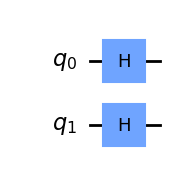

In [ ]:
QC.draw(output='mpl')

## Rituel de Aïka

### Pour représenter l'application du pouvoir de Aïka, on applique une porte NOT sur le premier qubit, ensuite une porte controlled-Z est appliquée sur les deux qubits. Enfin, on applique une porte NOT sur le premier qubit. 

In [ ]:
QC.x(0)
QC.cz(0,1)
QC.x(0)
QC.barrier()

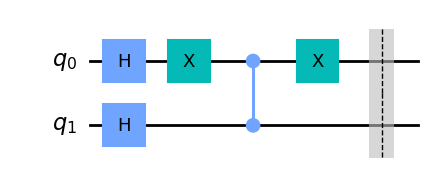

In [ ]:
QC.draw(output='mpl')

# Diffuseur

### Pour représenter l'application du diffuseur, on applique une porte Hadamard sur les deux qubits, ensuite une porte Z sur les deux qubits et une porte controlled-Z sur les deux qubits. Enfin, on applique une porte Hadamard sur les deux qubits.

In [ ]:
QC.h(0)
QC.h(1)
QC.z(0)
QC.z(1)
QC.cz(0,1)
QC.h(0)
QC.h(1)

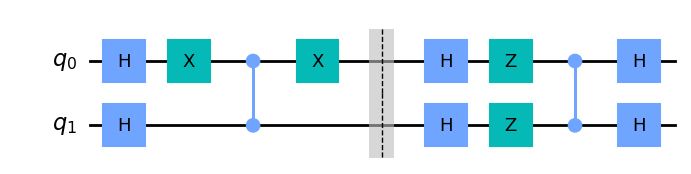

In [ ]:
QC.draw(output='mpl')

## Mesure les qubits

In [ ]:
QC.measure_all()

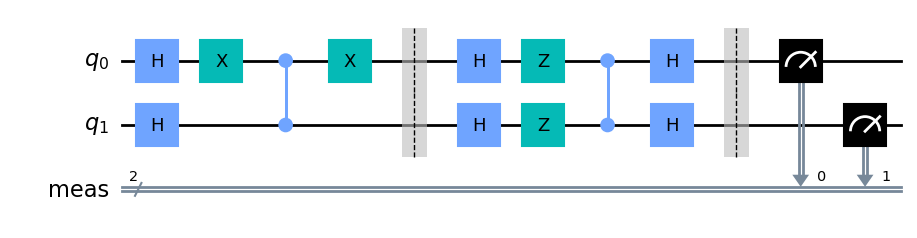

In [ ]:
QC.draw(output='mpl')

## Simuler le circuit quantique avec 1024 shots

In [27]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(QC, simulator, shots=10000).result()

In [28]:
counts = result.get_counts(QC)
counts

{'10': 10000}

## Visualiser les résultats

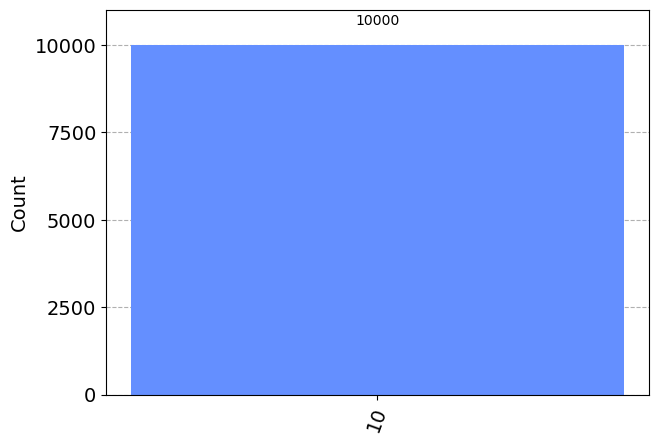

In [29]:
plot_histogram(counts)